In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

np.set_printoptions(precision=4, suppress=True)

In [2]:
# define the broken/good cobras
#brokens = [1, 39, 43, 54]
brokens = []
visibles= [e for e in range(1,58) if e not in brokens]
badIdx = np.array(brokens) - 1
goodIdx = np.array(visibles) - 1

# two groups for two cameras
cam_split = 28
group1 = goodIdx[goodIdx <= cam_split]
group2 = goodIdx[goodIdx > cam_split]

In [45]:
path = '/data/MCS/20191203_000/data/'
centers = np.load(path + 'phiCenter.npy')
radius = np.load(path + 'phiRadius.npy')
fw = np.load(path + 'phiFW.npy')
rv = np.load(path + 'phiRV.npy')
af = np.load(path + 'phiAngFW.npy')
ar = np.load(path + 'phiAngRV.npy')
sf = np.load(path + 'phiSpeedFW.npy')
sr = np.load(path + 'phiSpeedRV.npy')
mf = np.load(path + 'phiMMFW.npy')
mr = np.load(path + 'phiMMRV.npy')
bad = np.load(path + 'bad.npy')

In [ ]:
path = '/data/MCS/20191029_004/data/'
centersX = np.load(path + 'phiCenter.npy')
radiusX = np.load(path + 'phiRadius.npy')
fwX = np.load(path + 'phiFW.npy')
rvX = np.load(path + 'phiRV.npy')
afX = np.load(path + 'phiAngFW.npy')
arX = np.load(path + 'phiAngRV.npy')
sfX = np.load(path + 'phiSpeedFW.npy')
srX = np.load(path + 'phiSpeedRV.npy')
mfX = np.load(path + 'phiMMFW.npy')
mrX = np.load(path + 'phiMMRV.npy')
badX = np.load(path + 'bad.npy')

In [ ]:
centers = np.load(path + 'phiCenter_A.npy')
radius = np.load(path + 'phiRadius_A.npy')
fw = np.load(path + 'phiFW_A.npy')
rv = np.load(path + 'phiRV_A.npy')
af = np.load(path + 'phiAngFW_A.npy')
ar = np.load(path + 'phiAngRV_A.npy')
sf = np.load(path + 'phiSpeedFW_A.npy')
sr = np.load(path + 'phiSpeedRV_A.npy')
mf = np.load(path + 'phiMMFW_A.npy')
mr = np.load(path + 'phiMMRV_A.npy')
bad = np.load(path + 'bad_A.npy')
mf2 = np.load(path + 'phiMMFW2_A.npy')
mr2 = np.load(path + 'phiMMRV2_A.npy')
bad2 = np.load(path + 'bad2_A.npy')

In [25]:
bad

array([], dtype=int64)

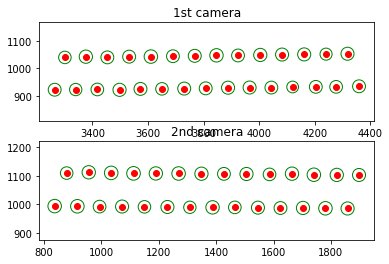

In [46]:
plt.figure(1)
plt.clf()

plt.subplot(211)
ax = plt.gca()

ax.plot(centers[group1].real, centers[group1].imag, 'ro')
ax.axis('equal')
for idx in group1:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'1st camera')

plt.subplot(212)
ax = plt.gca()

ax.plot(centers[group2].real, centers[group2].imag, 'ro')
ax.axis('equal')
for idx in group2:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'2nd camera')

plt.show()

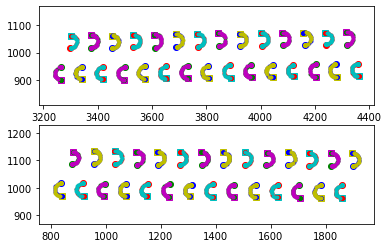

In [47]:
plt.figure(2)
plt.clf()

plt.subplot(211)
ax = plt.gca()
ax.axis('equal')

for n in range(1):
    for k in group1:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.subplot(212)
ax = plt.gca()
ax.axis('equal')

for n in range(1):
    for k in group2:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.show()

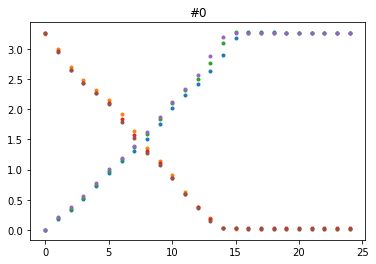

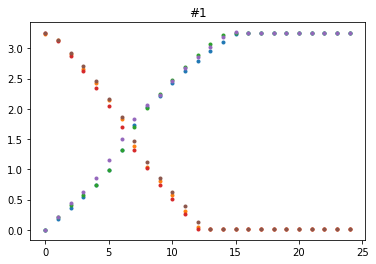

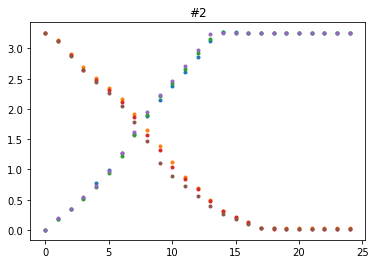

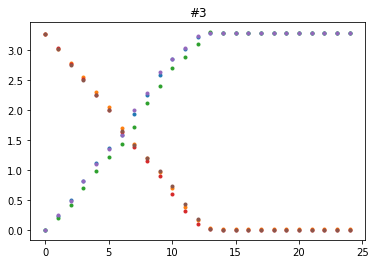

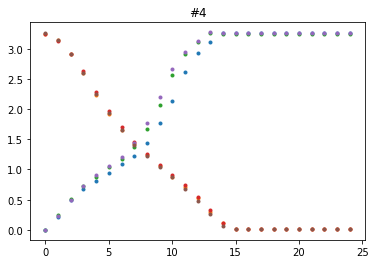

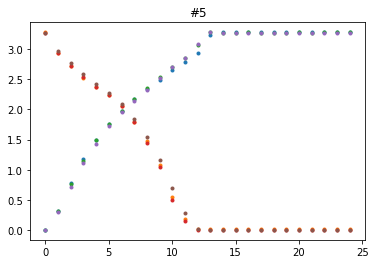

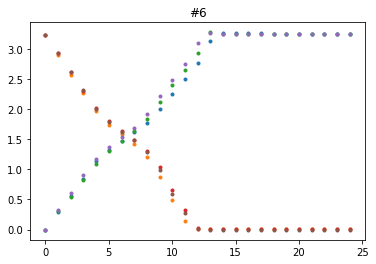

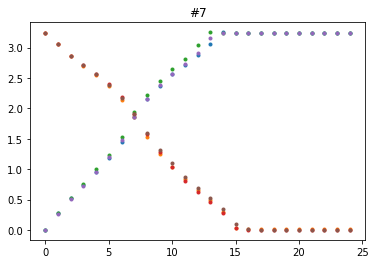

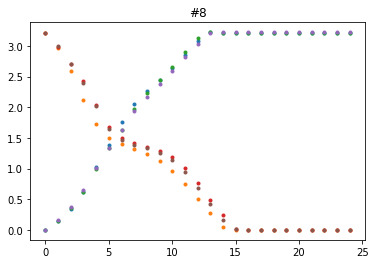

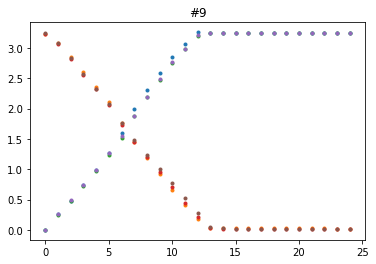

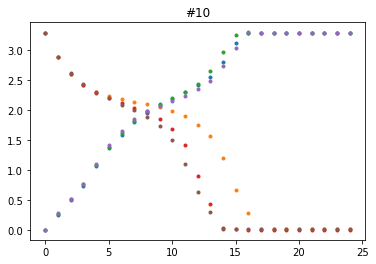

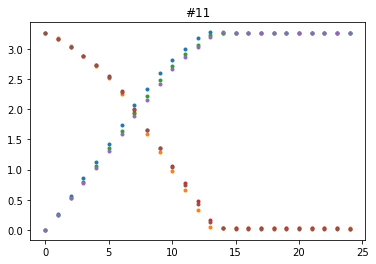

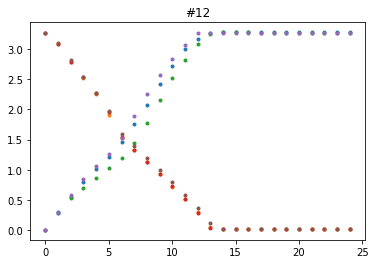

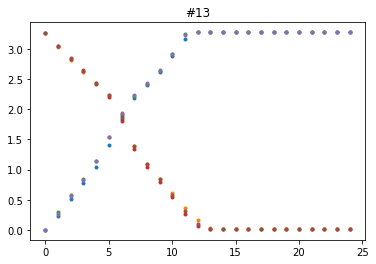

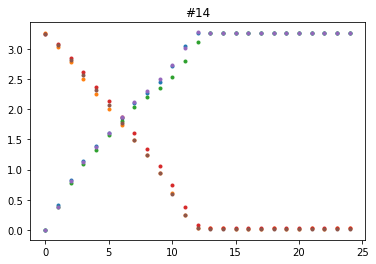

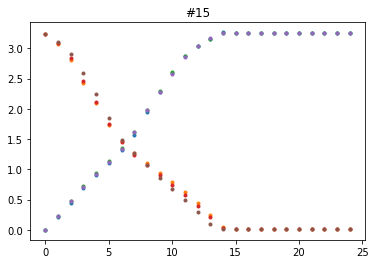

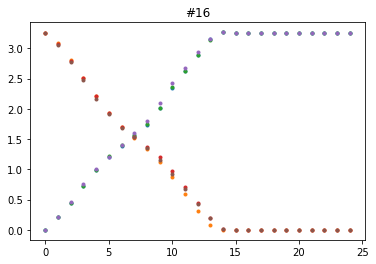

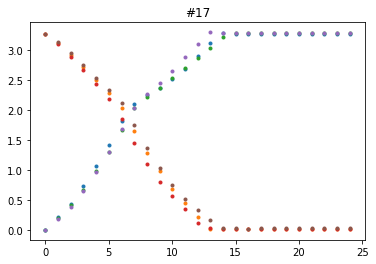

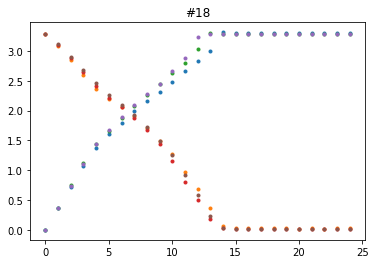

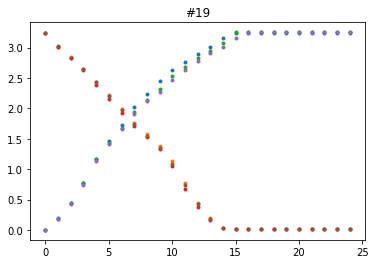

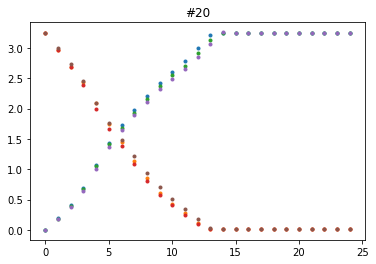

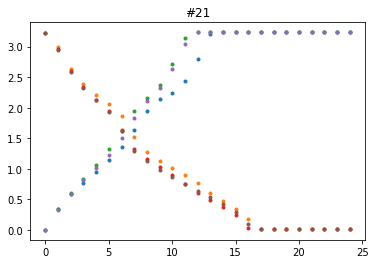

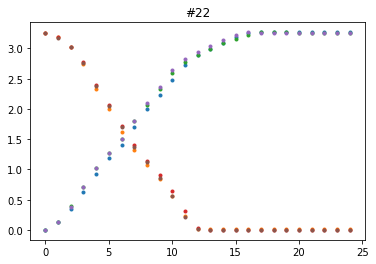

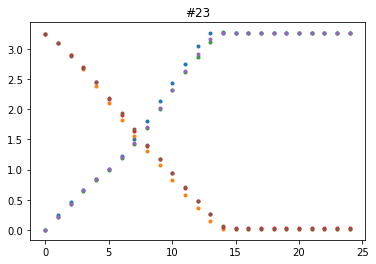

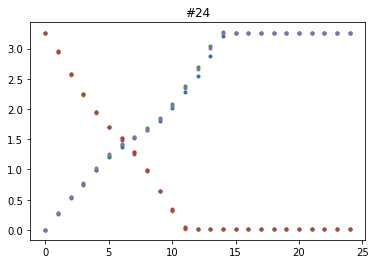

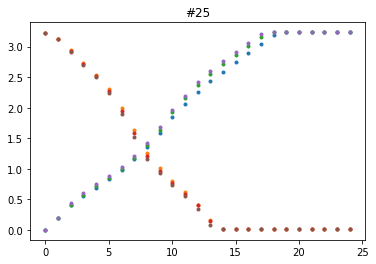

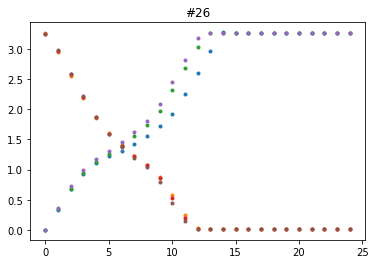

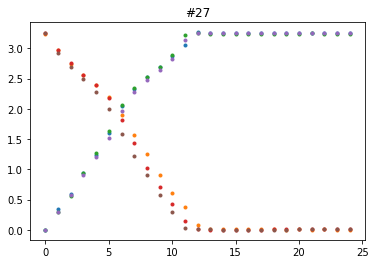

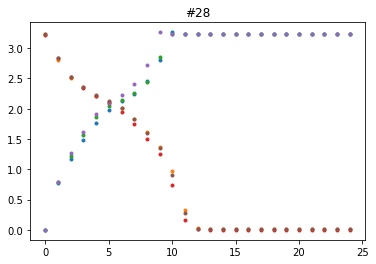

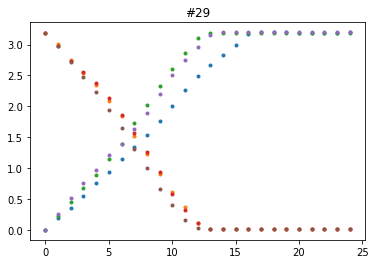

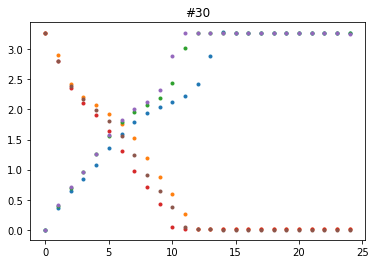

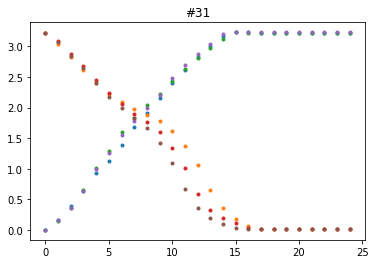

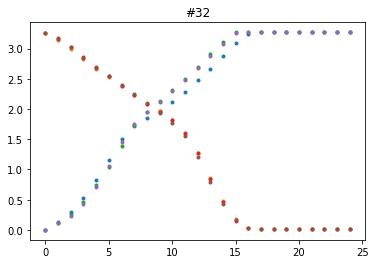

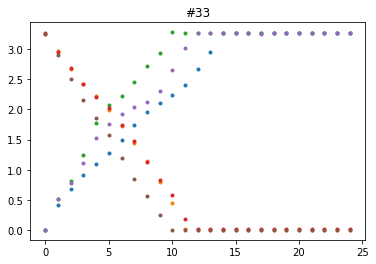

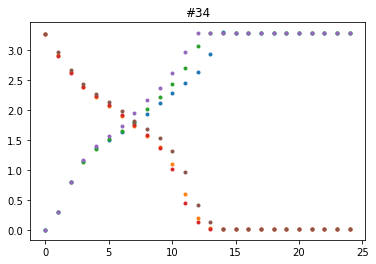

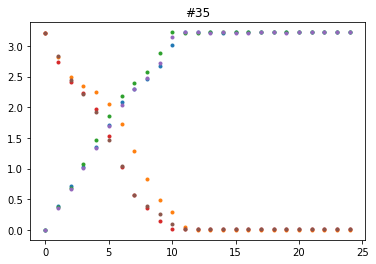

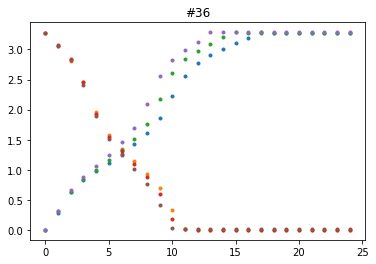

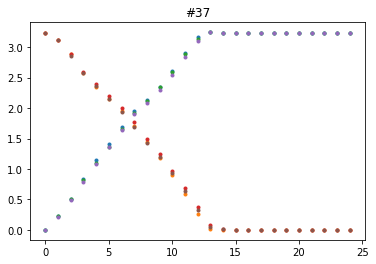

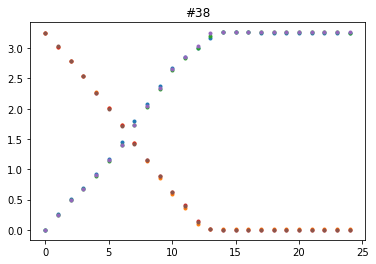

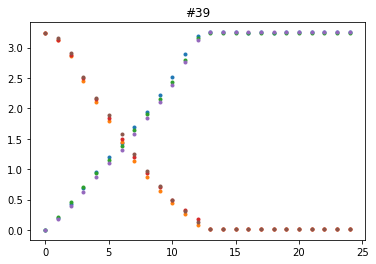

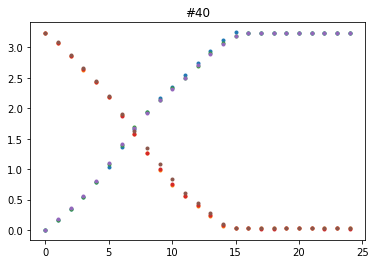

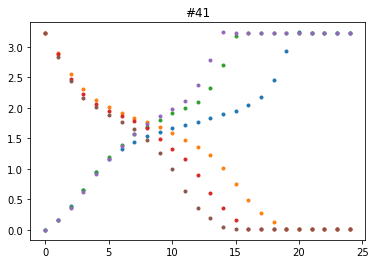

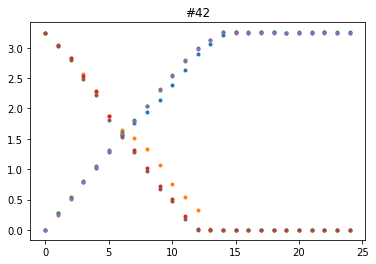

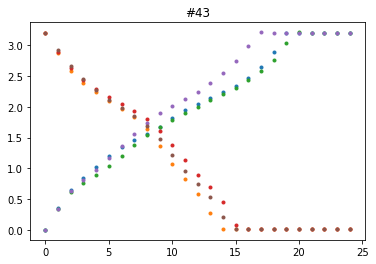

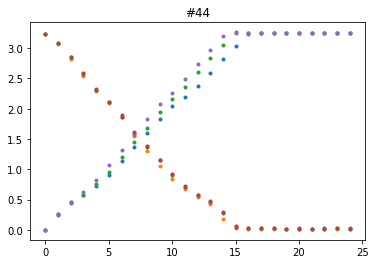

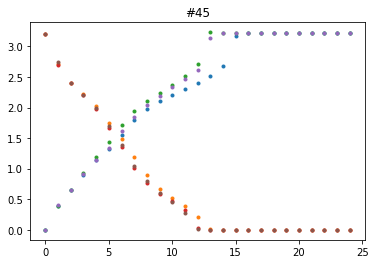

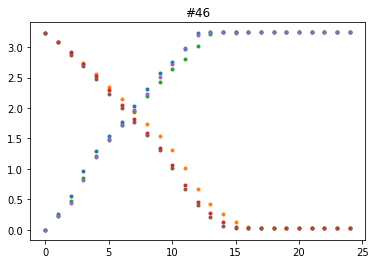

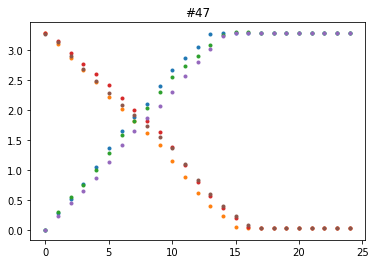

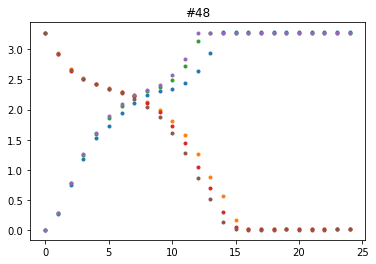

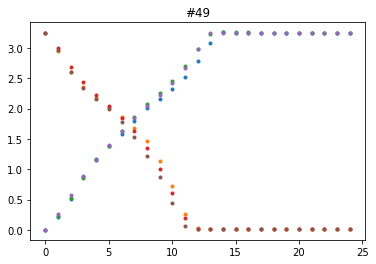

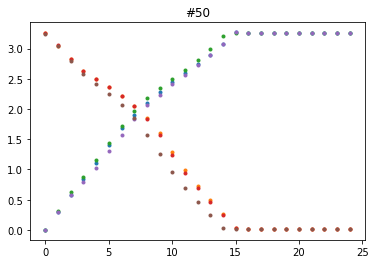

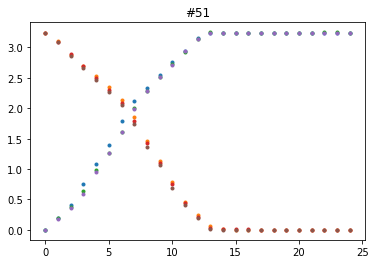

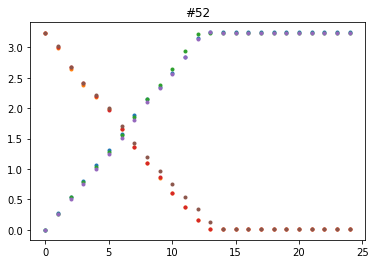

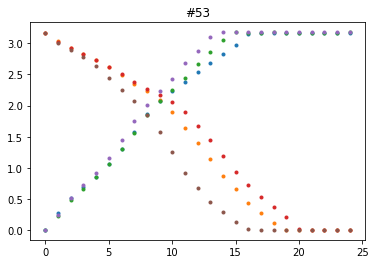

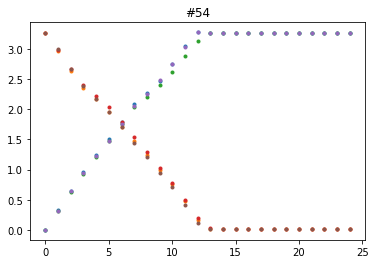

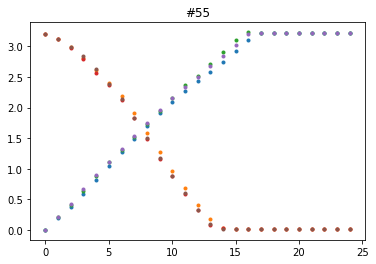

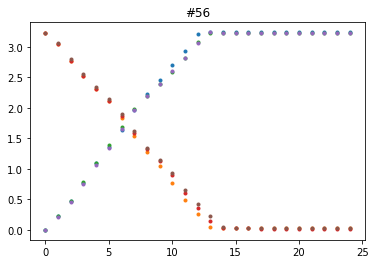

In [48]:
for c in range(57):
#    plt.figure(3)
#    plt.clf()
    ax = plt.gca()
    ax.set_title(f'#{c}')
    for n in range(af.shape[1]):
        ax.plot(af[c, n], '.')
        ax.plot(ar[c, n], '.')
    plt.show()

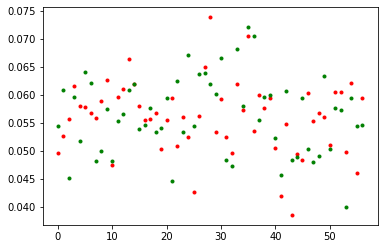

In [49]:
plt.figure(4)
plt.clf()

plt.plot(np.rad2deg(sf), 'r.')
plt.plot(np.rad2deg(sr), 'g.')

In [ ]:
c = 6

ax = plt.gca()
ax.set_title(f'#{c}')
for n in range(afX.shape[1]):
    ax.plot(afX[c, n], '.')
    ax.plot(arX[c, n], '.')

In [ ]:
c = 6

plt.figure(4)
plt.clf()
ax = plt.gca()
ax.set_title(f'#{c}')

ax.plot(np.rad2deg(mf[c]), 'r')
ax.plot(np.rad2deg(mfX[c]), 'm')
ax.plot(np.rad2deg(mr[c]), 'g')
ax.plot(np.rad2deg(mrX[c]), 'b')

ax.set_xlim([0,56])

In [ ]:
x=np.arange(mf.shape[1])*3.6
c = 6
step = 150

plt.figure(4)
plt.clf()
ax = plt.gca()
ax.set_title(f'#{c} FW')

for data in af[c]:
#    for i in range(len(data)-1):
    for i in range(14):
        spd = np.rad2deg(data[i+1] - data[i]) / step
        ax.plot([np.rad2deg(data[i]), np.rad2deg(data[i+1])], [spd, spd], color='gray')

ax.plot(x, np.rad2deg(mf[c]), 'r')
#ax.plot(x,np.rad2deg(mf2[c]), 'pink')

ax.set_xlim([0,190])

In [ ]:
x=np.arange(mf.shape[1])*3.6
c = 5
step = 400

plt.figure(4)
plt.clf()
ax = plt.gca()
ax.set_title(f'#{c} RV')

for data in ar[c]:
    for i in range(len(data)-1):
        spd = np.rad2deg(data[i] - data[i+1]) / step
        ax.plot([np.rad2deg(data[i+1]), np.rad2deg(data[i])], [spd, spd], color='gray')

ax.plot(x, np.rad2deg(mr[c]), 'r')
#ax.plot(x,-np.rad2deg(mr2[c]), color='pink')

ax.set_xlim([0,190])

In [ ]:
path = '/data/MCS/20191114_006/data/'
data = np.load(path + 'phiData.npy')

In [ ]:
c = 1

plt.figure(5)
plt.clf()
for n in range(data.shape[1]):
    plt.plot(np.rad2deg(data[c,n,:,0]))

In [ ]:
np.rad2deg(data[1,9,:,0]), data[1,9,:,3]

In [ ]:
from ics.cobraCharmer import pfiDesign
import pathlib

In [ ]:
xml = pathlib.Path('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC02_init.xml')
model = pfiDesign.PFIDesign(xml)

In [ ]:
model.motorOntimeSlowFwd2, model.motorOntimeSlowRev2

In [ ]:
tf = model.motorOntimeSlowFwd2.copy()
tr = model.motorOntimeSlowRev2.copy()

In [ ]:
tr[12] = 0.03
tf[28] = 0.025

In [ ]:
model.updateOntimes(phiFwd=tf, phiRev=tr, fast=False)
model.createCalibrationFile('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC02_01.xml')

In [ ]:
path = '/data/MCS/20191120_008/data/'
data = np.load(path + 'phiData.npy')

In [ ]:
c = 35

plt.figure(4)
plt.clf()
for n in range(data.shape[1]):
    plt.plot(np.rad2deg(data[c,n,:,0]))

In [ ]:
np.rad2deg(data[35,14,:,0]), np.rad2deg(data[35,15,:,0])

In [ ]:
np.rad2deg(data[20,7,:,0]), data[20,7,:,1], data[20,7,:,2], data[20,7,:,3]

In [ ]:
c = 35
it = 14

plt.gca().set_aspect('equal')
plt.plot(data[c,it,:,1], data[c,it,:,2], 'o')
plt.plot(centers[c].real, centers[c].imag, 'x')

In [ ]:
centers[20]